# **Section 1 Project**
---
# 🏆 Goal of project
다음 분기에는 어떤 게임을 설계해야 할까?


In [1]:
#로컬에서 데이터 불러오기.
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (2).csv


In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns', None)
data=pd.read_csv('vgames2.csv')
df=pd.DataFrame(data)
df.head(15)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


# **전처리**

In [3]:
# 불필요한 column 제거

df=df.drop(['Unnamed: 0'],axis=1)
df.head(2)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01


In [4]:
# 결측치 처리 

# Year,Genre,Publisher에 결측지가 존재
# 모두 분석에 꼭 필요한 columns들이고 다른 값으로 치환해서 쓸 수 없으므로 결측지가 포함되어 있는 game들의 데이터를 drop.
print(df.isna().sum())
print(df.shape)
df=df.dropna(subset=['Year', 'Genre', 'Publisher'])
print(df.isna().sum())
print(df.shape)
df['Year']=(df['Year']).astype(int)

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64
(16598, 9)
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64
(16241, 9)


In [5]:
# 각 대륙별 sales 데이터값 정리하기 (K,M 제 값에 맞게 치환 후 float으로 바꾸기)

print(df.dtypes)
Sales=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

# M지우기, K를 000으로 치환 후 million으로 나누기 판매량 데이터들 float으로 바꾸기

def stringToFloat(string):

  string=string.replace('M','')
  tmpFloat = float(string.replace('K','000'))
  return tmpFloat

for col in Sales:
  df[col]=df[col].apply(stringToFloat)
  df.loc[df[col] > 1000 , col] = df.loc[df[col] > 1000 , col] / 1000000

display(df.head(15),df.dtypes)

Name           object
Platform       object
Year            int64
Genre          object
Publisher      object
NA_Sales       object
EU_Sales       object
JP_Sales       object
Other_Sales    object
dtype: object


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01


Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [6]:
# Year 20이하면 + 2000, 21이상 100이하면 + 1900을 해줘서 단위 맞춰주기
print(df['Year'].iloc[70:80])
df.loc[df['Year'] < 20, 'Year'] += 2000
df.loc[(df['Year'] > 21) & (df['Year'] < 100), 'Year'] += 1900 
print(df['Year'].iloc[70:80])

72    2015
73    2003
74       9
75    2010
76    1985
77    2000
78    2007
79    2008
80    2005
81      97
Name: Year, dtype: int64
72    2015
73    2003
74    2009
75    2010
76    1985
77    2000
78    2007
79    2008
80    2005
81    1997
Name: Year, dtype: int64


# **데이터 분석**

In [7]:
#지역에 따라서 선호하는 게임 장르
#연도별 게임의 트렌드
#출고량이 높은 게임의 이유를 분석 및 시각화.

In [8]:
from scipy import stats
from scipy.stats import normaltest
from scipy.stats import chisquare  
import seaborn as sns
import matplotlib.pyplot as plt

# 1.지역에 따라서 선호하는 게임 장르가 다를까




In [9]:
#각 지역별 판매 평균 구하기

## 각 지역별 판매 평균
# (0도 포함, 출시됏는지 아닌지 잘 모름. 판단근거가 부족함.) (publisher 고려 해보려고 했지만 너무 많음.)

NA_mean = df['NA_Sales'].mean()
EU_mean = df['EU_Sales'].mean()
JP_mean = df['JP_Sales'].mean()
Other_mean = df['Other_Sales'].mean()


# 분석에 용히하게 단위를 1000단위로 치환 후 정수 변환.

NA_mean = int(round(NA_mean*1000,0))
EU_mean = int(round(EU_mean*1000,0))
JP_mean = int(round(JP_mean*1000,0))
Other_mean = int(round(Other_mean*1000,0))


# 각 지역별 판매 평균 DataFrame으로 만들기

NA_mean_=pd.DataFrame({'Genre':'Mean','NA_Sales':[NA_mean]})
NA_mean_=NA_mean_.set_index('Genre')
EU_mean_=pd.DataFrame({'Genre':'Mean','EU_Sales':[EU_mean]})
EU_mean_=EU_mean_.set_index('Genre')
JP_mean_=pd.DataFrame({'Genre':'Mean','JP_Sales':[JP_mean]})
JP_mean_=JP_mean_.set_index('Genre')
Other_mean_=pd.DataFrame({'Genre':'Mean','Other_Sales':[Other_mean]})
Other_mean_=Other_mean_.set_index('Genre')

display(NA_mean,NA_mean_)

265

,NA_Sales
Genre,
Mean,265


In [11]:
# 각 지역의 장르별 판매 평균 구하기 (Groupby 사용)


# 단위를 1000단위로 치환 후 정수로 변환

NA_mean_Genre = round(df.groupby('Genre').NA_Sales.mean()*1000,0).astype(int)
EU_mean_Genre = round(df.groupby('Genre').EU_Sales.mean()*1000,0).astype(int)
JP_mean_Genre = round(df.groupby('Genre').JP_Sales.mean()*1000,0).astype(int)
Other_mean_Genre = round(df.groupby('Genre').Other_Sales.mean()*1000,0).astype(int)

# 각 지역의 장르별 판매 평균 DataFrame으로 만들기

NA_mean_Genre=pd.DataFrame(NA_mean_Genre)
EU_mean_Genre=pd.DataFrame(EU_mean_Genre)
JP_mean_Genre=pd.DataFrame(JP_mean_Genre)
Other_mean_Genre=pd.DataFrame(Other_mean_Genre)

NA_mean_Genre

,NA_Sales
Genre,
Action,265
Adventure,80
Fighting,264
Misc,235
Platform,510
Puzzle,215
Racing,291
Role-Playing,218
Shooter,449


In [12]:
# 각 지역별 판매 평균과 장르별 평균 데이터프레임 합치기.

NA=pd.concat([NA_mean_,NA_mean_Genre])
EU=pd.concat([EU_mean_,EU_mean_Genre])
JP=pd.concat([JP_mean_,JP_mean_Genre])
Other=pd.concat([Other_mean_,Other_mean_Genre])

# 시각화를 위해 groupby로 인해 인덱스로 있는 Genre를 Colunm으로 변환

NA.reset_index(level=['Genre'], inplace = True)
EU.reset_index(level=['Genre'], inplace = True)
JP.reset_index(level=['Genre'], inplace = True)
Other.reset_index(level=['Genre'], inplace = True)

# 4개 DataFrame 합치기

from functools import reduce
Region=[NA,EU,JP,Other]
Genre_Region = reduce(lambda left, right: pd.merge(left, right, on='Genre'), Region)


Genre_Region

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Mean,265,147,78,48
1,Action,265,159,48,57
2,Adventure,80,50,41,13
3,Fighting,264,120,104,43
4,Misc,235,124,62,43
5,Platform,510,230,150,59
6,Puzzle,215,89,99,22
7,Racing,291,193,46,63
8,Role-Playing,218,125,234,39
9,Shooter,449,242,30,80


           Genre  NA_Sales
0           Mean       265
1         Action       265
2      Adventure        80
3       Fighting       264
4           Misc       235
5       Platform       510
6         Puzzle       215
7         Racing       291
8   Role-Playing       218
9        Shooter       449
10    Simulation       214
11        Sports       290
12      Strategy       101


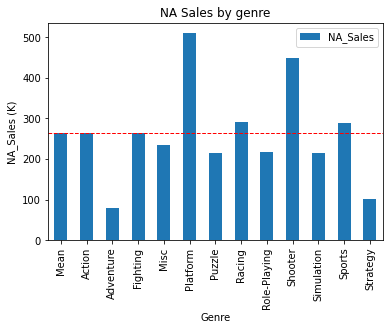

In [33]:
# NA에서 게임 장르 트랜드 그래프
Genre_Region.plot(kind='bar',x="Genre",y='NA_Sales')
plt.ylabel('NA_Sales (K)')
plt.axhline(y=NA_mean, color='red', linestyle='--', linewidth=1)
plt.title("NA Sales by genre")
print(NA)

# NA의 게임 장르 트랜드
# Platform(510K), Shooter(449K)의 판매량이 평균 판매량(265K) 보다 많이 높음.
# 반면에 Adventure(80k), Strategy(101k)는 평균에 한참 못미침.

           Genre  EU_Sales
0           Mean       147
1         Action       159
2      Adventure        50
3       Fighting       120
4           Misc       124
5       Platform       230
6         Puzzle        89
7         Racing       193
8   Role-Playing       125
9        Shooter       242
10    Simulation       134
11        Sports       161
12      Strategy        67


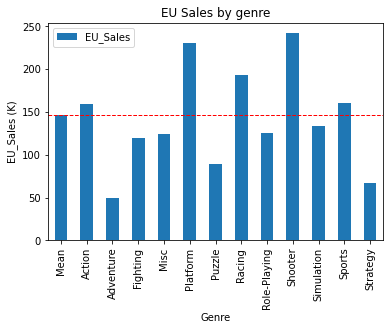

In [34]:
# EU에서 게임 장르 트랜드 그래프
Genre_Region.plot(kind='bar',x="Genre",y='EU_Sales')
plt.ylabel('EU_Sales (K)')
plt.axhline(y=EU_mean, color='red', linestyle='--', linewidth=1)
plt.title("EU Sales by genre")
print(EU)

# EU의 게임 장르 트랜드
# Shooter(242K), Platform(230K),Racing(193K)의 판매량이 평균 판매량(147K) 보다 많이 높음.
# 반면에 Adventure(50k), Strategy(67k)는 평균보다 많이 낮음.

           Genre  JP_Sales
0           Mean        78
1         Action        48
2      Adventure        41
3       Fighting       104
4           Misc        62
5       Platform       150
6         Puzzle        99
7         Racing        46
8   Role-Playing       234
9        Shooter        30
10    Simulation        75
11        Sports        59
12      Strategy        73


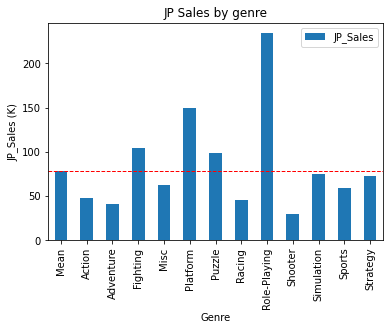

In [35]:
# JP에서 게임 장르 트랜드 그래프
Genre_Region.plot(kind='bar',x="Genre",y='JP_Sales')
plt.ylabel('JP_Sales (K)')
plt.axhline(y=JP_mean, color='red', linestyle='--', linewidth=1)
plt.title("JP Sales by genre")
print(JP)

# JP의 게임 장르 트랜드
# Role-Playing(244K)이 압도적으로 많이 팔렸고 그 뒤로 Platform(150K),Fighting(104K)의 판매량이 평균 판매량(78) 보다 높음.
# 반면에 Shooter (30k), Adventrue(41k)는 평균보다 많이 낮음.

           Genre  Other_Sales
0           Mean           48
1         Action           57
2      Adventure           13
3       Fighting           43
4           Misc           43
5       Platform           59
6         Puzzle           22
7         Racing           63
8   Role-Playing           39
9        Shooter           80
10    Simulation           37
11        Sports           58
12      Strategy           17


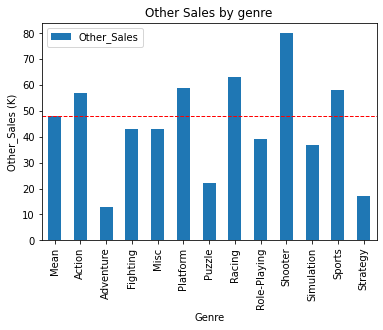

In [36]:
# Other에서 게임 장르 트랜드 그래프
Genre_Region.plot(kind='bar',x="Genre",y='Other_Sales')
plt.ylabel('Other_Sales (K)')
plt.axhline(y=Other_mean, color='red', linestyle='--', linewidth=1)
plt.title("Other Sales by genre")
print(Other)

# Other의 게임 장르 트랜드
# Shooter(80K)가 압도적으로 판매량이 많고 뒤이어 Racing(63K),Platform(59K)의 판매량이 평균 판매량(48K) 보다 높음.
# 반면에 Adventrue(13k), Strategy(17K)는 평균보다 많이 낮음.

In [17]:
# 지역에 따른 선호 게임장르 종합 분석.

# 전체적으로 NA,EU,Other의 선호하는 게임장르는 비슷함 (Shooter, Platform, racing을 선호하고 Advernture와 Strategy를 비선호)
# JP 만 특이하게 Role-Playing이 압도적으로 판매량이 높고 Shooter의 판매량이 낮음

# 4개지역 모두에서 공통적으로 Platform의 판매량이 높고 adventure의 판매량이 낮음
# 4개 지역 모두를 만족 시키려면 Platform 장르에 초점을 두는게 좋은 전략.

# 하지만 누적통계기 때문에 '다음 분기에는 어떤 게임을 설계해야 할까?'에 알맞는 통계치가 아님.

# 2.연도별 게임의 트렌드가 있을까

In [18]:
# 1.연도별 장르 트렌드 (몇 년도에 어떤 장르의 게임이 많이 출시 했는가)

# 2020년,1980년의 데이터는 1개 2017년의 데이터는 3개뿐 이므로 통계에서 제외.
years=[1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,
       1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
genre=['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']

#연도당 각 Genre들을 카운트
arr = np.zeros((len(genre),len(years)),int)
arrMax = 0
for index, row in df.iterrows():
  for i in range(len(genre)):
    for j in range(len(years)) :
      if genre[i] == row['Genre'] and years[j] == row['Year'] :
        arr[i][j] = arr[i][j]+1
        if arrMax < arr[i][j] :
          arrMax = arr[i][j]

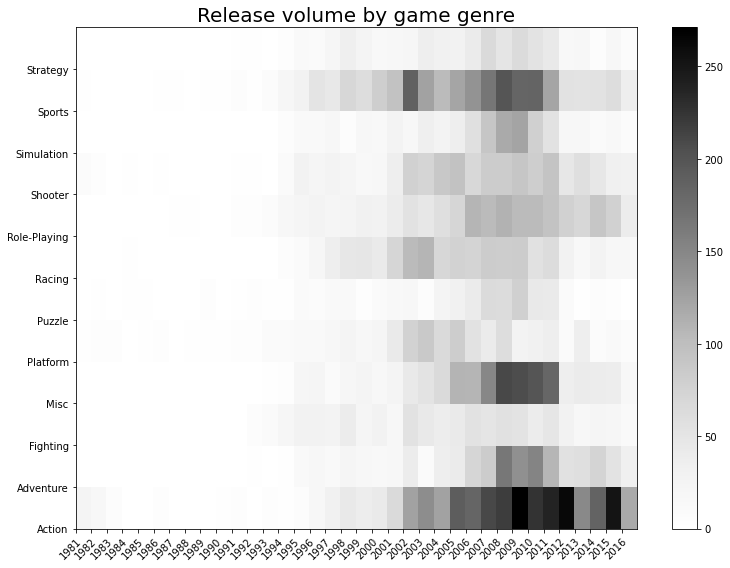

In [19]:
# heatmap을 이용한 시각화

fig, ax = plt.subplots()
fig.set_size_inches(11,8)

ax.set_xticks(np.arange(len(years)))
ax.set_yticks(np.arange(len(genre)))

ax.set_xticklabels(years)
ax.set_yticklabels(genre)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Release volume by game genre",fontsize=20)

plt.pcolormesh(arr,cmap='Greys', vmin=0, vmax=arrMax)
plt.colorbar()
plt.tight_layout()

plt.show()

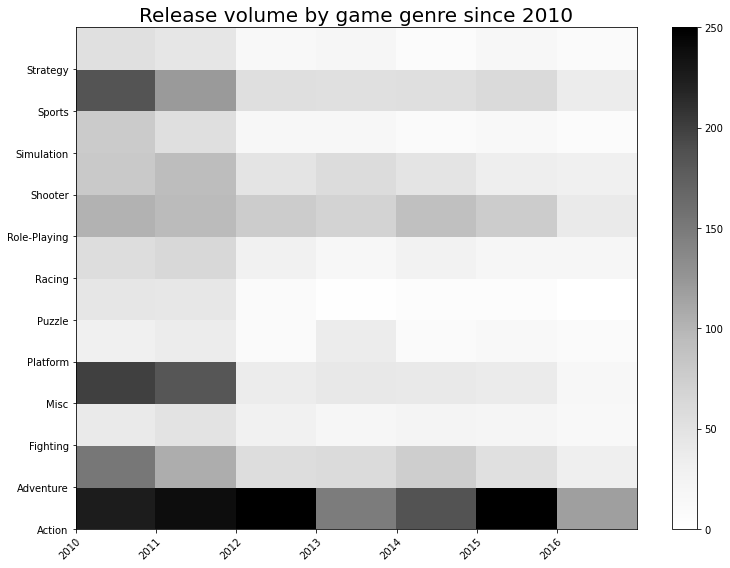

In [37]:
# 2010년 이후 데이터만 시각화

years2010=[2010,2011,2012,2013,2014,2015,2016]

arr_1 = np.zeros((len(genre),len(years2010)),int)
arrMax_1 = 0
for index, row in df.iterrows():
  for i in range(len(genre)):
    for j in range(len(years2010)) :
      if genre[i] == row['Genre'] and years2010[j] == row['Year'] :
        arr_1[i][j] = arr_1[i][j]+1
        if arrMax_1 < arr_1[i][j] :
          arrMax_1 = arr_1[i][j]

fig, ax = plt.subplots()
fig.set_size_inches(11,8)

ax.set_xticks(np.arange(len(years2010)))
ax.set_yticks(np.arange(len(genre)))

ax.set_xticklabels(years2010)
ax.set_yticklabels(genre)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Release volume by game genre since 2010",fontsize=20)

plt.pcolormesh(arr_1,cmap='Greys', vmin=0, vmax=250)
plt.colorbar()
plt.tight_layout()

plt.show()

# 다음 분기에 어떤 게임을 출시해야 하느냐를 봐야하기 때문에 최근 데이터에 중점을 둠.
# 2010년 이후에는 Action장르의 게임이 압도적으로 출시가 많이 됐고Sports,Role-playing,Shooter, Advanture  장르 게임출시도 많이 됐음.

In [21]:
# 연도별 platform 트렌드(각 연도당 어떤 platform들의 게임이 출시가 많이 됐는가)

gb= df.groupby(["Platform"]).groups
gb.keys()
platform=['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX']
platform2=['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']

# Y축이 많아 2개로 나눠서 연도당 각 platform을 카운트
arr1 = np.zeros((len(platform),len(years)),int)
for index, row in df.iterrows():
  for i in range(len(platform)):
    for j in range(len(years)) :
      if platform[i] == row['Platform'] and years[j] == row['Year'] :
        arr1[i][j] = arr1[i][j]+1
    
arr2 = np.zeros((len(platform2),len(years)),int)
for index, row in df.iterrows():
  for i in range(len(platform2)):
    for j in range(len(years)) :
      if platform2[i] == row['Platform'] and years[j] == row['Year'] :
        arr2[i][j] = arr2[i][j]+1

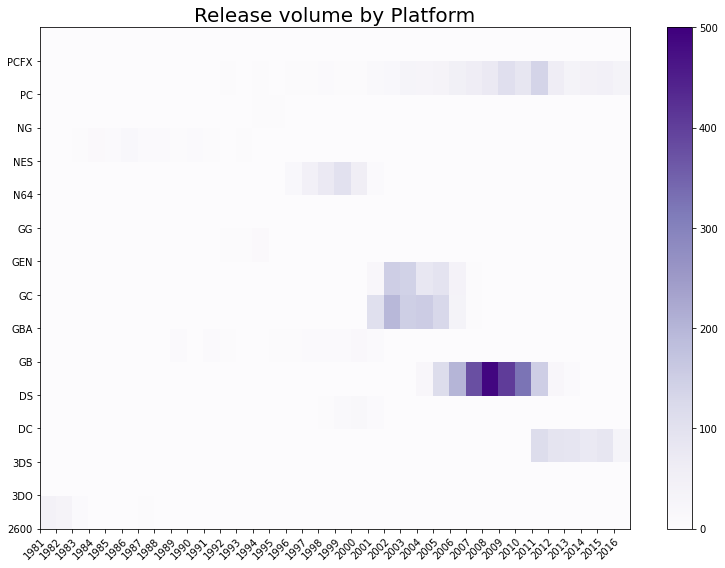

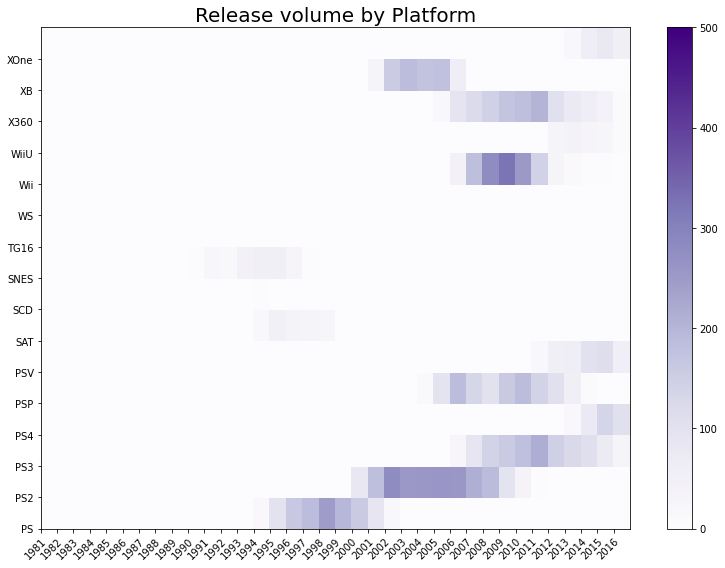

In [22]:
# heatmap을 이용한 시각화
# Y축이 많아 2개로 나눠서 시각화

fig, ax = plt.subplots()
fig.set_size_inches(11,8)

ax.set_xticks(np.arange(len(years)))
ax.set_yticks(np.arange(len(platform)))

ax.set_xticklabels(years)
ax.set_yticklabels(platform)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Release volume by Platform",fontsize=20)

plt.pcolormesh(arr1,cmap='Purples', vmin=0, vmax=500)
plt.colorbar()
plt.tight_layout()

fig, ax = plt.subplots()
fig.set_size_inches(11,8)

ax.set_xticks(np.arange(len(years)))
ax.set_yticks(np.arange(len(platform2)))

ax.set_xticklabels(years)
ax.set_yticklabels(platform2)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Release volume by Platform",fontsize=20)

plt.pcolormesh(arr2,cmap='Purples', vmin=0, vmax=500)
plt.colorbar()
plt.tight_layout()

plt.show()

In [23]:
# 2010년 이후 데이터만 시각화

arr1_1 = np.zeros((len(platform),len(years2010)),int)
for index, row in df.iterrows():
  for i in range(len(platform)):
    for j in range(len(years2010)) :
      if platform[i] == row['Platform'] and years2010[j] == row['Year'] :
        arr1_1[i][j] = arr1_1[i][j]+1
    
arr2_1 = np.zeros((len(platform2),len(years2010)),int)
for index, row in df.iterrows():
  for i in range(len(platform2)):
    for j in range(len(years2010)) :
      if platform2[i] == row['Platform'] and years2010[j] == row['Year'] :
        arr2_1[i][j] = arr2_1[i][j]+1


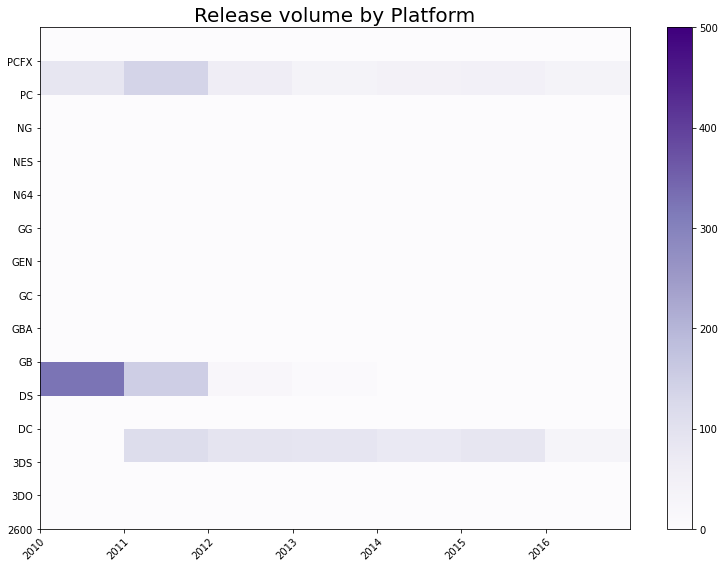

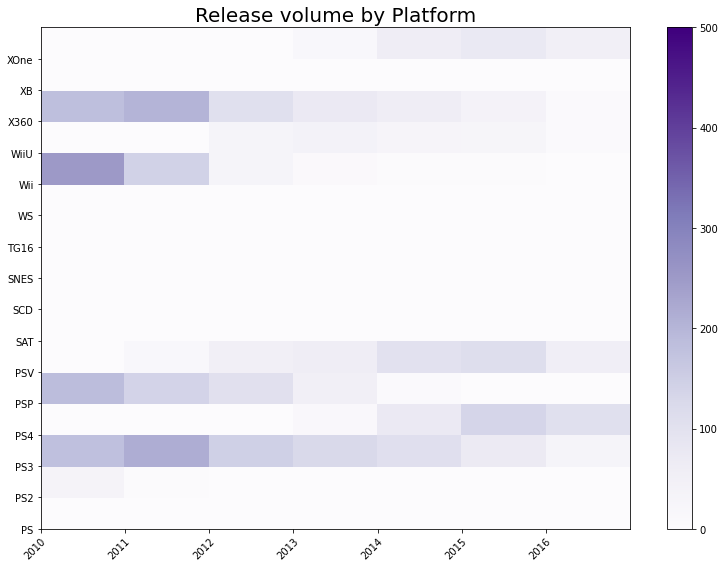

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(11,8)

ax.set_xticks(np.arange(len(years2010)))
ax.set_yticks(np.arange(len(platform)))

ax.set_xticklabels(years2010)
ax.set_yticklabels(platform)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Release volume by Platform",fontsize=20)

plt.pcolormesh(arr1_1,cmap='Purples', vmin=0, vmax=500)
plt.colorbar()
plt.tight_layout()

fig, ax = plt.subplots()
fig.set_size_inches(11,8)

ax.set_xticks(np.arange(len(years2010)))
ax.set_yticks(np.arange(len(platform2)))

ax.set_xticklabels(years2010)
ax.set_yticklabels(platform2)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Release volume by Platform",fontsize=20)

plt.pcolormesh(arr2_1,cmap='Purples', vmin=0, vmax=500)
plt.colorbar()
plt.tight_layout()

plt.show()

# 다음 분기의 게임 출시를 위한 분석이기 때문에 최근 데이터를 봐야함.
# 2010년도 이후로 PC,3DS,XONE,PSV,PS3,PS4,X360 플랫폼 게임의 출시량이 많음

In [25]:
# 연도별 게임의 트렌드 종합 분석
# 2010년 이후 Action 장르의 게임 출시량이 압도적임.
# 2010년도 이후로 PC,3DS,XONE,PSV,PS3,PS4,X360 플랫폼 게임의 출시량이 많음
# PC,3DS,XONE,PSV,PS3,PS4,X360 플랫폼에서 Action 장르 게임을 출시하는게 트렌드를 따라가는 것으로 생각함.

# 3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [26]:
#출고량이 높은 게임에 대한 분석 및 시각화 프로세스 (높은 출고량 게임들이 무엇인지 찾고 다른 것들과 무슨 연관이 있는지 찾는다)

# 단위 K로 맞춰주기
#df['NA_Sales']=(df['NA_Sales']*1000).astype(int)
#df['EU_Sales']=(df['EU_Sales']*1000).astype(int)
#df['JP_Sales']=(df['JP_Sales']*1000).astype(int)
#df['Other_Sales']=(df['Other_Sales']*1000).astype(int)


# 각 지역별 Sales
df_NA=df[['Name',	'Platform',	'Year',	'Genre',	'Publisher',	'NA_Sales']]
df_EU=df[['Name',	'Platform',	'Year',	'Genre',	'Publisher',	'EU_Sales']]
df_JP=df[['Name',	'Platform',	'Year',	'Genre',	'Publisher',	'JP_Sales']]
df_Other=df[['Name',	'Platform',	'Year',	'Genre',	'Publisher',	'Other_Sales']]

# 각 지역별 sales top 10
display(df_NA.nlargest(10,'NA_Sales'),df_EU.nlargest(10,'EU_Sales'),df_JP.nlargest(10,'JP_Sales'),df_Other.nlargest(10,'Other_Sales'))


# 누적판매량 데이터이기 때문에 출시년도가 옛날인 데이터들은 분석에 유의미하지 않음.

,Name,Platform,Year,Genre,Publisher,NA_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26.93
1203,Tetris,GB,1989,Puzzle,Nintendo,23.20
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75
4343,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59
3014,Wii Play,Wii,2006,Misc,Nintendo,14.03
13111,Super Mario World,SNES,1990,Platform,Nintendo,12.78


,Name,Platform,Year,Genre,Publisher,EU_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,29.02
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,12.88
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,11.01
11137,Nintendogs,DS,2005,Simulation,Nintendo,11.00
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,9.27
13229,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,9.26
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,9.23
3014,Wii Play,Wii,2006,Misc,Nintendo,9.20
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,8.89
10899,Wii Fit Plus,Wii,2009,Sports,Nintendo,8.59


,Name,Platform,Year,Genre,Publisher,JP_Sales
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,10.22
9416,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,7.20
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,6.81
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,6.50
10555,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.04
10621,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.65
10917,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,5.38
3273,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,5.33
511,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,5.32
1847,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,4.87


,Name,Platform,Year,Genre,Publisher,Other_Sales
14669,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,10.57
2908,Wii Sports,Wii,2006,Sports,Nintendo,8.46
14665,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,7.53
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,4.14
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,3.31
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,2.96
8213,Pro Evolution Soccer 2008,PS2,2007,Sports,Konami Digital Entertainment,2.93
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,2.90
3014,Wii Play,Wii,2006,Misc,Nintendo,2.85
11137,Nintendogs,DS,2005,Simulation,Nintendo,2.75


In [27]:
# 2010년 이후로 데이터 설정.

condition_NA = df_NA['Year']>2010
condition_EU = df_EU['Year']>2010
condition_JP = df_JP['Year']>2010
condition_Other= df_Other['Year']>2010

df_NA_2010=df_NA[condition_NA]
df_EU_2010=df_EU[condition_EU]
df_JP_2010=df_JP[condition_JP]
df_Other_2010=df_Other[condition_Other]

df_NA_2010_largest=df_NA_2010.nlargest(10,"NA_Sales")
df_EU_2010_largest=df_EU_2010.nlargest(10,"EU_Sales")
df_JP_2010_largest=df_JP_2010.nlargest(10,"JP_Sales")
df_Other_2010_largest=df_Other_2010.nlargest(10,"Other_Sales")

display(df_NA_2010_largest,df_EU_2010_largest,df_JP_2010_largest,df_Other_2010_largest)

,Name,Platform,Year,Genre,Publisher,NA_Sales
10913,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63
2809,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03
6393,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01
5604,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6.72
14576,Halo 4,X360,2012,Shooter,Microsoft Game Studios,6.63
223,Just Dance 3,Wii,2011,Misc,Ubisoft,6.05
9070,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77
9994,Minecraft,X360,2013,Misc,Microsoft Game Studios,5.58
14120,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54


,Name,Platform,Year,Genre,Publisher,EU_Sales
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,9.27
2639,FIFA 16,PS4,2015,Sports,Electronic Arts,6.06
4240,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,5.88
14120,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.82
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,5.81
9070,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.81
10913,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,5.31
9035,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,5.05
2723,FIFA 14,PS3,2013,Sports,Electronic Arts,4.32
13489,FIFA 12,PS3,2011,Sports,Electronic Arts,4.32


,Name,Platform,Year,Genre,Publisher,JP_Sales
8906,Animal Crossing: New Leaf,3DS,2012,Simulation,Nintendo,4.36
15674,Monster Hunter 4,3DS,2013,Role-Playing,Capcom,3.44
12966,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,Nintendo,3.18
15678,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,Nintendo,3.14
4251,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,3.08
10892,Monster Hunter X,3DS,2015,Action,Capcom,2.78
5147,Yokai Watch 2 Shinuchi,3DS,2014,Role-Playing,Level 5,2.68
11123,Mario Kart 7,3DS,2011,Racing,Nintendo,2.67
537,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,Nintendo,2.62
10379,New Super Mario Bros. 2,3DS,2012,Platform,Nintendo,2.47


,Name,Platform,Year,Genre,Publisher,Other_Sales
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,4.14
4240,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,2.52
9070,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,2.31
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,2.02
9035,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,2.01
2723,FIFA 14,PS3,2013,Sports,Electronic Arts,1.73
14120,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,1.62
3079,FIFA 15,PS4,2014,Sports,Electronic Arts,1.47
13489,FIFA 12,PS3,2011,Sports,Electronic Arts,1.42
6881,Call of Duty: Ghosts,PS3,2013,Shooter,Activision,1.38


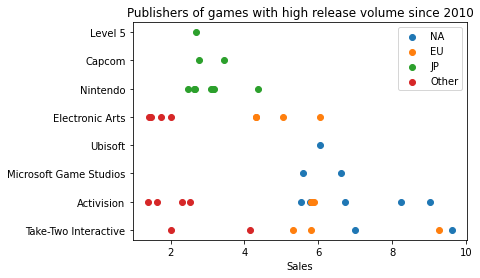

In [28]:
# 2010년 이후 출시량이 높은 game들의 publisher들

plt.scatter(x=df_NA_2010_largest['NA_Sales'],y=df_NA_2010_largest['Publisher'],label='NA')
plt.scatter(x=df_EU_2010_largest['EU_Sales'],y=df_EU_2010_largest['Publisher'],label='EU')
plt.scatter(x=df_JP_2010_largest['JP_Sales'],y=df_JP_2010_largest['Publisher'],label='JP')
plt.scatter(x=df_Other_2010_largest['Other_Sales'],y=df_Other_2010_largest['Publisher'],label='Other')
plt.xlabel('Sales')
plt.title("Publishers of games with high release volume since 2010")
plt.legend(loc=0)
plt.show()

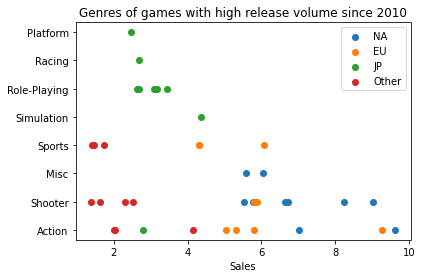

In [29]:
# 2010년 이후 출시량이 높은 game들의 Genre들

plt.scatter(x=df_NA_2010_largest['NA_Sales'],y=df_NA_2010_largest['Genre'],label='NA')
plt.scatter(x=df_EU_2010_largest['EU_Sales'],y=df_EU_2010_largest['Genre'],label='EU')
plt.scatter(x=df_JP_2010_largest['JP_Sales'],y=df_JP_2010_largest['Genre'],label='JP')
plt.scatter(x=df_Other_2010_largest['Other_Sales'],y=df_Other_2010_largest['Genre'],label='Other')
plt.xlabel('Sales')
plt.title("Genres of games with high release volume since 2010")
plt.legend(loc=0)
plt.show()

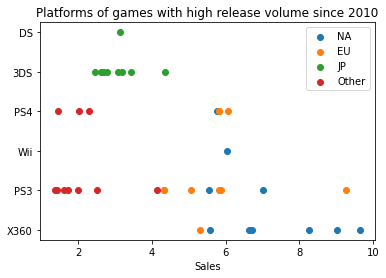

In [30]:
# 2010년 이후 출시량이 높은 game들의 Platform들

plt.scatter(x=df_NA_2010_largest['NA_Sales'],y=df_NA_2010_largest['Platform'],label='NA')
plt.scatter(x=df_EU_2010_largest['EU_Sales'],y=df_EU_2010_largest['Platform'],label='EU')
plt.scatter(x=df_JP_2010_largest['JP_Sales'],y=df_JP_2010_largest['Platform'],label='JP')
plt.scatter(x=df_Other_2010_largest['Other_Sales'],y=df_Other_2010_largest['Platform'],label='Other')
plt.xlabel('Sales')
plt.title("Platforms of games with high release volume since 2010")
plt.legend(loc=0)
plt.show()

In [31]:
# 출고량이 높은 게임에 대한 분석
# 2010이후 출고량이 높은 게임들 중 Publisher는 Activision, Take-two interactive가 많았다.
# 2010이후 출고량이 높은 게임들 중 Genre는 Action, Shooter 가 많았다 
# 2010이후 출고량이 높은 게임들 중 Platform은 PS3, X360가 많았다. 

# **결론**

In [32]:
# 첫번째 분석인 지역에 따른 선호 게임장르는 Sales양에 비례하여 지역마다 선호 게임장르가 분명히 갈리긴 하지만 1980년부터 누적된 Sales 통계이기 때문에 다음 분기에는 어떤 게임을 설계해야 할까?'에 알맞는 통계치가 아님.

# 연도별 게임의 트렌드에서 2010년 이후 Action 장르의 게임 출시량이 압도적이고 2010년도 이후로 PC,3DS,XONE,PSV,PS3,PS4,X360 플랫폼 게임의 출시량이 많기 때문에
# PC,3DS,XONE,PSV,PS3,PS4,X360 플랫폼에서 Action 장르 게임을 출시하는게 트렌드를 따라가는 것으로 생각함.

# 출고량이 높은 게임에 대한 분석
# 2010이후 출고량이 높은 게임들 중 Publisher는 Activision, Take-two interactive가 많았다.
# 2010이후 출고량이 높은 게임들 중 Genre는 Action, Shooter 가 많았다 
# 2010이후 출고량이 높은 게임들 중 Platform은 PS3, X360가 많았다. 

# 최종적으로 2010이후 연도별 게임 트랜드분석과 출고량이 높은 게임에 대한 분석에 겹치는 Genre인 Action, Platform은 PS3나 X360, Publisher는 Activision, Take-two interactive로 맞춰서 게임을 설계하는 것이 좋을 것 같다.  